In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('takehome_users.csv',encoding='latin-1')

In [ ]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df.rename(columns={'object_id':'user_id'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [ ]:
dt = pd.read_csv('takehome_user_engagement.csv')

In [ ]:
dt.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [ ]:
dt.time_stamp=pd.to_datetime(dt.time_stamp)

In [ ]:
dt1=dt.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()

In [ ]:
dt1=pd.DataFrame(dt1)

In [ ]:
dt1.head()

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [ ]:
dt1 = dt1.rolling(window=7, min_periods=1).sum()

In [ ]:
dt1.reset_index(inplace=True)

In [ ]:
dt1.head()

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0


In [ ]:
dt2 = dt1.groupby('user_id')[['visited']].max()

In [ ]:
dt2.head()

,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


In [ ]:
dt2.loc[dt2['visited'] >= 3, 'adopted_user'] = 1
dt2.loc[dt2['visited'] < 3, 'adopted_user'] = 0

In [ ]:
dt2['visited'] = dt2['visited'].astype(int)
dt2['adopted_user'] = dt2['adopted_user'].astype(int)

In [ ]:
dt2.reset_index(inplace=True) 
dt2.head()

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1


In [ ]:
df = dt2.merge(df, how='inner', on='user_id', sort=True)

In [ ]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df.isnull().sum()

user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
dtype: int64

In [ ]:
df['invited_by_user_id'].fillna(0, inplace=True)
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)

In [ ]:
df.creation_time = pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df['active_days'] = df['last_session_creation_time'] - df['creation_time']
df['active_days'] = df['active_days'].dt.days

In [ ]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,-16183
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,-16025
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,-15784
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,-15847
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,-15723


In [ ]:
df.isnull().sum()

user_id                       0
visited                       0
adopted_user                  0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
dtype: int64

In [ ]:
new_df = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'active_days', 'adopted_user' ]]

In [ ]:
new_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
0,GUEST_INVITE,1,0,11,10803,-16183,0
1,ORG_INVITE,0,0,1,316,-16025,1
2,ORG_INVITE,0,0,94,1525,-15784,0
3,GUEST_INVITE,0,0,1,5151,-15847,1
4,GUEST_INVITE,0,0,193,5240,-15723,1


Class 0: 808
Class 1: 8015
Proportion of class 0 is  9.16 %


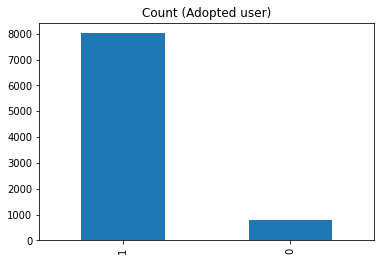

In [ ]:
target_count=new_df.adopted_user.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (Adopted user)');

In [ ]:
X=new_df.iloc[:,1:-1]

y=new_df.iloc[:,-1]

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import imblearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [68]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [69]:
y_train.value_counts()

1    5622
0     554
Name: adopted_user, dtype: int64

In [70]:
y_smt.value_counts()

1    5123
0    5123
Name: adopted_user, dtype: int64

In [71]:
X_smt.shape

(10246, 5)

In [73]:
creation_source_dum = pd.get_dummies(new_df['creation_source'], drop_first=True)
creation_source_dum

,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8818,1,0,0,0
8819,0,0,0,1
8820,0,0,0,0
8821,0,1,0,0


In [74]:
X = pd.concat([X_smt, creation_source_dum], axis=1)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,1,801,-16142,0.0,0.0,0.0,0.0
1,0,0,1,0,-16132,1.0,0.0,0.0,0.0
2,0,0,140,9394,-15863,1.0,0.0,0.0,0.0
3,0,0,328,10203,-15753,0.0,0.0,0.0,0.0
4,0,0,312,0,-15594,0.0,0.0,0.0,0.0


In [78]:
X.corr()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,1.000000,0.472700,0.017833,0.023512,0.002701,-0.005258,-0.014002,0.014865,-0.003993
enabled_for_marketing_drip,0.472700,1.000000,0.018667,-0.000532,0.020415,0.000888,-0.006499,0.028553,-0.020014
org_id,0.017833,0.018667,1.000000,-0.031793,-0.008228,0.004750,0.008596,0.008587,-0.021243
invited_by_user_id,0.023512,-0.000532,-0.031793,1.000000,0.008314,-0.007415,-0.006362,-0.011539,0.006728
active_days,0.002701,0.020415,-0.008228,0.008314,1.000000,-0.004072,0.006833,0.006215,0.003882
ORG_INVITE,-0.005258,0.000888,0.004750,-0.007415,-0.004072,1.000000,-0.231589,-0.393777,-0.324570
PERSONAL_PROJECTS,-0.014002,-0.006499,0.008596,-0.006362,0.006833,-0.231589,1.000000,-0.161192,-0.132863
SIGNUP,0.014865,0.028553,0.008587,-0.011539,0.006215,-0.393777,-0.161192,1.000000,-0.225910
SIGNUP_GOOGLE_AUTH,-0.003993,-0.020014,-0.021243,0.006728,0.003882,-0.324570,-0.132863,-0.225910,1.000000


### Finding Feature Importance to predict the future adopted user

In [80]:
# Use Random Forest to evaluate the importance of features 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')

rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_smt, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: org_id               Importance: 0.37
Variable: invited_by_user_id   Importance: 0.32
Variable: active_days          Importance: 0.25
Variable: enabled_for_marketing_drip Importance: 0.04
Variable: opted_in_to_mailing_list Importance: 0.03


[None, None, None, None, None]

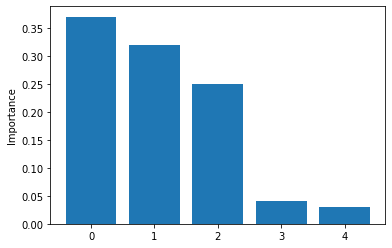

In [81]:
import numpy as np
import matplotlib.pyplot as plt
feature_importances.sort(key=lambda x: x[1], reverse=True)
feature_importances
feature = list(zip(*feature_importances))[0]
importance = list(zip(*feature_importances))[1]
x=np.arange(len(feature))
plt.bar(x,importance,align='center')
plt.xticks(x,x) 
plt.ylabel('Importance')
plt.show()

## Important features to predict whether a user is an 'adopted user' are :

0 : org_id

1 : invited_by_user_id

2 : active_days 